# Housing Affordability Project Documentation

## Overview

The Housing Affordability Project aims to analyze and predict housing affordability using the HUD-USC NSAF (National Survey of America's Families) dataset. This project leverages big data analysis techniques to gain insights into the factors influencing housing affordability and develop a predictive model.

The NSAF dataset provides a wealth of information about households, including their income, housing expenses, household size, education level, employment status, age of household head, race/ethnicity, and geographic region. By analyzing this dataset, we can gain a better understanding of the dynamics of housing affordability and explore potential solutions to address affordability challenges.

## Objectives

The key objectives of the Housing Affordability Project are as follows:

1. **Data Exploration**: Perform exploratory data analysis to understand the characteristics and distribution of housing-related variables in the NSAF dataset. Identify any patterns, trends, or correlations between variables that can shed light on housing affordability.

2. **Feature Selection**: Determine the most relevant variables for predicting housing affordability based on the NSAF dataset. Employ techniques like correlation analysis and feature importance scores to identify the key predictors that will be used in the predictive model.

3. **Predictive Modeling**: Build a predictive model using machine learning algorithms to estimate housing affordability. Train the model using historical data from the NSAF dataset and evaluate its performance in predicting housing affordability for new, unseen data.

4. **Interpretation and Communication**: Interpret the results of the predictive model and communicate the findings to stakeholders. Provide insights into the factors that significantly impact housing affordability and propose potential strategies or interventions to improve affordability.

## Tools and Technologies

The Housing Affordability Project will utilize the following tools and technologies:

- Python: A programming language used for data analysis, modeling, and visualization.
- Jupyter Notebook: An interactive development environment for Python, ideal for exploratory data analysis and documentation.
- Pandas: A powerful data manipulation library in Python, used for data preprocessing and analysis.
- Scikit-learn: A machine learning library in Python, providing a wide range of algorithms for predictive modeling.
- Matplotlib and Seaborn: Visualization libraries in Python, used for creating informative plots and charts.

## Dataset

The primary dataset used in this project is the HUD-USC NSAF dataset. It contains data on various housing-related factors and demographic information for households across multiple years. The dataset will be downloaded and processed to extract relevant features for analysis and modeling.

## Project Workflow

The project will follow a structured workflow that encompasses the following steps:

1. Data acquisition: Download the NSAF dataset and load it into the analysis environment.
2. Data preprocessing: Clean and preprocess the dataset, handle missing values, and ensure data consistency.
3. Exploratory data analysis: Explore the dataset, visualize the variables, and gain insights into housing affordability patterns.
4. Feature selection: Identify the most important variables for predicting housing affordability based on analysis and domain knowledge.
5. Predictive modeling: Train and evaluate machine learning models to estimate housing affordability.
6. Interpretation and communication: Interpret the model results, present findings, and propose recommendations for improving housing affordability.


## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## Importing datasets

In [2]:
# Specify the file paths for the NSAF datasets
dataset_paths = [
    'thads2007.txt',
    'thads2009.txt',
    'thads2011.txt',
    'thads2013.txt'
]

# Create an empty list to store the datasets
datasets = []

# Load each dataset into a DataFrame and append it to the list
for path in dataset_paths:
    dataset = pd.read_csv(path)
    datasets.append(dataset)


# Concatenate the datasets into a single DataFrame
merged_df = pd.concat(datasets, ignore_index=True)

# Display the merged DataFrame
print(merged_df.head())

          CONTROL  AGE1  BEDRMS  PER REGION   LMED   FMR    L30    L50    L80  \
0  '100003130103'    -9       3   -6    '1'  66440  1048  14344  23890  37385   
1  '100003130203'    69       3    1    '1'  66440  1048  14344  23890  37385   
2  '100006110249'    45       3    1    '3'  49575   757  10893  18140  29019   
3  '100006370140'    47       4    5    '3'  49575   847  16793  27980  44774   
4  '100007130148'    30       2    2    '3'  55474   616  14064  23439  37508   

   ...  FMTCOST06RELAMICAT  FMTCOST08RELAMICAT  FMTCOST12RELAMICAT  \
0  ...    '3 50 - 60% AMI'    '4 60 - 80% AMI'   '5 80 - 100% AMI'   
1  ...     '1 LTE 30% AMI'     '1 LTE 30% AMI'     '1 LTE 30% AMI'   
2  ...    '4 60 - 80% AMI'   '5 80 - 100% AMI'  '6 100 - 120% AMI'   
3  ...      '7 120% AMI +'      '7 120% AMI +'      '7 120% AMI +'   
4  ...    '3 50 - 60% AMI'    '3 50 - 60% AMI'    '3 50 - 60% AMI'   

   FMTCOSTMEDRELAMICAT     FMTINCRELAMICAT       FMTASSISTED  \
0     '3 50 - 60% AMI'      

In [3]:
merged_df.columns

Index(['CONTROL', 'AGE1', 'BEDRMS', 'PER', 'REGION', 'LMED', 'FMR', 'L30',
       'L50', 'L80', 'IPOV', 'BUILT', 'STATUS', 'TYPE', 'VALUE', 'VACANCY',
       'TENURE', 'NUNITS', 'ZINC2', 'ROOMS', 'ZADEQ', 'ZSMHC', 'WEIGHT',
       'METRO3', 'STRUCTURETYPE', 'OWNRENT', 'UTILITY', 'OTHERCOST', 'COST06',
       'COST12', 'COST08', 'COSTMED', 'TOTSAL', 'ASSISTED', 'GLMED', 'GL30',
       'GL50', 'GL80', 'APLMED', 'ABL30', 'ABL50', 'ABL80', 'ABLMED', 'BURDEN',
       'INCRELAMIPCT', 'INCRELAMICAT', 'INCRELPOVPCT', 'INCRELPOVCAT',
       'INCRELFMRPCT', 'INCRELFMRCAT', 'COST06RELAMIPCT', 'COST06RELAMICAT',
       'COST06RELPOVPCT', 'COST06RELPOVCAT', 'COST06RELFMRPCT',
       'COST06RELFMRCAT', 'COST08RELAMIPCT', 'COST08RELAMICAT',
       'COST08RELPOVPCT', 'COST08RELPOVCAT', 'COST08RELFMRPCT',
       'COST08RELFMRCAT', 'COST12RELAMIPCT', 'COST12RELAMICAT',
       'COST12RELPOVPCT', 'COST12RELPOVCAT', 'COST12RELFMRPCT',
       'COST12RELFMRCAT', 'COSTMedRELAMIPCT', 'COSTMedRELAMICAT',
      

## Defining columns to extract

We define the list of columns we want to extract. These are the variables determined to be important for the housing affordability predictive model.

In [32]:
columns_to_extract = [
    'BEDRMS', 'BUILT', 'BURDEN', 'COST06', 'COST08', 'COST12', 'COSTMED', 'ASSISTED', 
    'FMR', 'ZINC2', 'UTILITY', 'OTHERCOST', 'VALUE', 'TOTSAL', 'ABL50', 'ABL80', 
    'ABLMED', 'APLMED', 'INCRELAMICAT', 'INCRELAMIPCT', 'COST06RELAMICAT', 
    'COST06RELAMIPCT', 'COST08RELAMICAT', 'COST08RELAMIPCT', 'COST12RELAMICAT', 
    'COST12RELAMIPCT', 'COSTMedRELAMICAT', 'COSTMedRELAMIPCT', 'REGION', 'METRO', 
    'METRO3', 'AGE1', 'ZSMHC', 'PER', 'ROOMS'
]


## Column Existence Check
We check if the columns exist in the DataFrame, to prevent errors. This step is particularly useful when working with real-world data.

In [33]:
columns_to_extract = [col for col in columns_to_extract if col in merged_df.columns]


## Extracting Columns
Once we confirm the existence of our desired columns, we create a new DataFrame containing only these columns.

In [68]:
extracted_df = merged_df[columns_to_extract]
extracted_df.head()

,BEDRMS,BUILT,BURDEN,COST06,COST08,COST12,COSTMED,ASSISTED,FMR,ZINC2,...,COST12RELAMICAT,COST12RELAMIPCT,COSTMedRELAMICAT,COSTMedRELAMIPCT,REGION,METRO3,AGE1,ZSMHC,PER,ROOMS
0,3,2006,-9.000000,930.433662,1099.543363,1471.051872,930.433662,-9,1048,-6,...,5,85.157914,3,53.861996,'1','3',-9,-6,-6,5
1,3,2006,0.120759,313.244822,313.546804,314.210212,313.244822,-9,1048,47400,...,1,18.189356,1,18.133470,'1','3',69,477,1,5
2,3,1980,0.368308,1033.140781,1190.171218,1535.143405,1033.140781,-9,757,26000,...,6,119.100307,4,80.153674,'3','5',45,798,1,6
3,4,1985,0.099420,2202.786418,2565.164349,3361.254012,2202.786418,-9,847,174050,...,7,233.797904,7,153.218663,'3','5',47,1442,5,7
4,2,1980,0.134063,715.000000,715.000000,715.000000,715.000000,0,616,64000,...,3,57.284093,3,57.284093,'3','1',30,715,2,5


## EDA

In [69]:
data = extracted_df.copy()

In [70]:
data.describe()

,BEDRMS,BUILT,BURDEN,COST06,COST08,COST12,COSTMED,ASSISTED,FMR,ZINC2,...,COST08RELAMICAT,COST08RELAMIPCT,COST12RELAMICAT,COST12RELAMIPCT,COSTMedRELAMICAT,COSTMedRELAMIPCT,AGE1,ZSMHC,PER,ROOMS
count,301885.000000,301885.000000,301885.000000,301885.000000,301885.000000,301885.000000,301885.000000,301885.000000,301885.000000,3.018850e+05,...,301885.000000,301885.000000,301885.000000,301885.000000,301885.000000,301885.000000,301885.000000,301885.000000,301885.000000,301885.000000
mean,2.702831,1967.356603,1.712311,1606.459996,1792.666034,2201.732617,1548.390730,-5.831065,1129.599771,6.168334e+04,...,4.312523,101.149847,4.656972,123.160658,4.008036,88.090911,46.471829,1114.588602,1.865154,5.644047
std,1.079862,26.084584,107.793191,1744.660267,2048.434397,2726.022304,1654.094961,4.377158,414.372121,7.564790e+04,...,2.057691,100.525816,2.136918,133.790552,1.978060,81.876003,22.943180,1033.935940,2.647165,1.866052
min,0.000000,1919.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,-2.831600e+04,...,1.000000,-9.000000,1.000000,-9.000000,1.000000,-9.000000,-9.000000,-6.000000,-6.000000,1.000000
25%,2.000000,1950.000000,0.121663,730.385925,759.438348,803.000000,718.166667,-9.000000,849.000000,1.678800e+04,...,2.000000,50.568145,3.000000,53.724774,2.000000,47.577120,34.000000,461.000000,1.000000,4.000000
50%,3.000000,1970.000000,0.225942,1143.000000,1234.337885,1412.568958,1112.556962,-9.000000,1032.000000,4.112000e+04,...,4.000000,75.713709,5.000000,86.550892,4.000000,68.757283,48.000000,872.000000,2.000000,5.000000
75%,3.000000,1990.000000,0.382522,1885.000000,2108.609566,2613.811409,1814.000000,0.000000,1314.000000,8.177500e+04,...,6.000000,119.314332,7.000000,148.913043,6.000000,102.772487,62.000000,1463.000000,3.000000,7.000000
max,10.000000,2013.000000,18180.000000,36531.951202,42891.320315,56861.895144,34288.550256,1.000000,3586.000000,2.977104e+06,...,7.000000,2019.710697,7.000000,2660.325598,7.000000,1710.695180,93.000000,13803.000000,20.000000,21.000000


In [37]:
data.dtypes

BEDRMS                int64
BUILT                 int64
BURDEN              float64
COST06              float64
COST08              float64
COST12              float64
COSTMED             float64
ASSISTED              int64
FMR                   int64
ZINC2                 int64
UTILITY             float64
OTHERCOST           float64
VALUE                 int64
TOTSAL                int64
ABL50               float64
ABL80               float64
ABLMED              float64
APLMED              float64
INCRELAMICAT          int64
INCRELAMIPCT        float64
COST06RELAMICAT       int64
COST06RELAMIPCT     float64
COST08RELAMICAT       int64
COST08RELAMIPCT     float64
COST12RELAMICAT       int64
COST12RELAMIPCT     float64
COSTMedRELAMICAT      int64
COSTMedRELAMIPCT    float64
REGION               object
METRO3               object
AGE1                  int64
ZSMHC                 int64
PER                   int64
ROOMS                 int64
dtype: object

In [38]:
data.info

<bound method DataFrame.info of         BEDRMS  BUILT    BURDEN       COST06       COST08       COST12  \
0            3   2006 -9.000000   930.433662  1099.543363  1471.051872   
1            3   2006  0.120759   313.244822   313.546804   314.210212   
2            3   1980  0.368308  1033.140781  1190.171218  1535.143405   
3            4   1985  0.099420  2202.786418  2565.164349  3361.254012   
4            2   1980  0.134063   715.000000   715.000000   715.000000   
...        ...    ...       ...          ...          ...          ...   
301880       1   1930  1.184571   691.000000   691.000000   691.000000   
301881       2   1950  0.000000     0.000000     0.000000     0.000000   
301882       3   1940  0.664932  2215.000000  2215.000000  2215.000000   
301883       1   1930  0.083418   417.000000   417.000000   417.000000   
301884       1   2012  0.000000     0.000000     0.000000     0.000000   

            COSTMED  ASSISTED   FMR   ZINC2  ...  COST12RELAMICAT  \
0        9

## Missing values

In [39]:
data.isnull().sum()

BEDRMS              0
BUILT               0
BURDEN              0
COST06              0
COST08              0
COST12              0
COSTMED             0
ASSISTED            0
FMR                 0
ZINC2               0
UTILITY             0
OTHERCOST           0
VALUE               0
TOTSAL              0
ABL50               0
ABL80               0
ABLMED              0
APLMED              0
INCRELAMICAT        0
INCRELAMIPCT        0
COST06RELAMICAT     0
COST06RELAMIPCT     0
COST08RELAMICAT     0
COST08RELAMIPCT     0
COST12RELAMICAT     0
COST12RELAMIPCT     0
COSTMedRELAMICAT    0
COSTMedRELAMIPCT    0
REGION              0
METRO3              0
AGE1                0
ZSMHC               0
PER                 0
ROOMS               0
dtype: int64

In [40]:
data.REGION.value_counts()

'3'    96332
'2'    75162
'4'    74975
'1'    55416
Name: REGION, dtype: int64

In [41]:
data.METRO3.value_counts()

'2'    138124
'1'     95243
'5'     25831
'3'     25215
'4'     15930
'9'      1542
Name: METRO3, dtype: int64

In [42]:
data.BURDEN

0        -9.000000
1         0.120759
2         0.368308
3         0.099420
4         0.134063
            ...   
301880    1.184571
301881    0.000000
301882    0.664932
301883    0.083418
301884    0.000000
Name: BURDEN, Length: 301885, dtype: float64

## Finding Correlations

In [43]:
correlation_matrix = data.corr()

<AxesSubplot:>

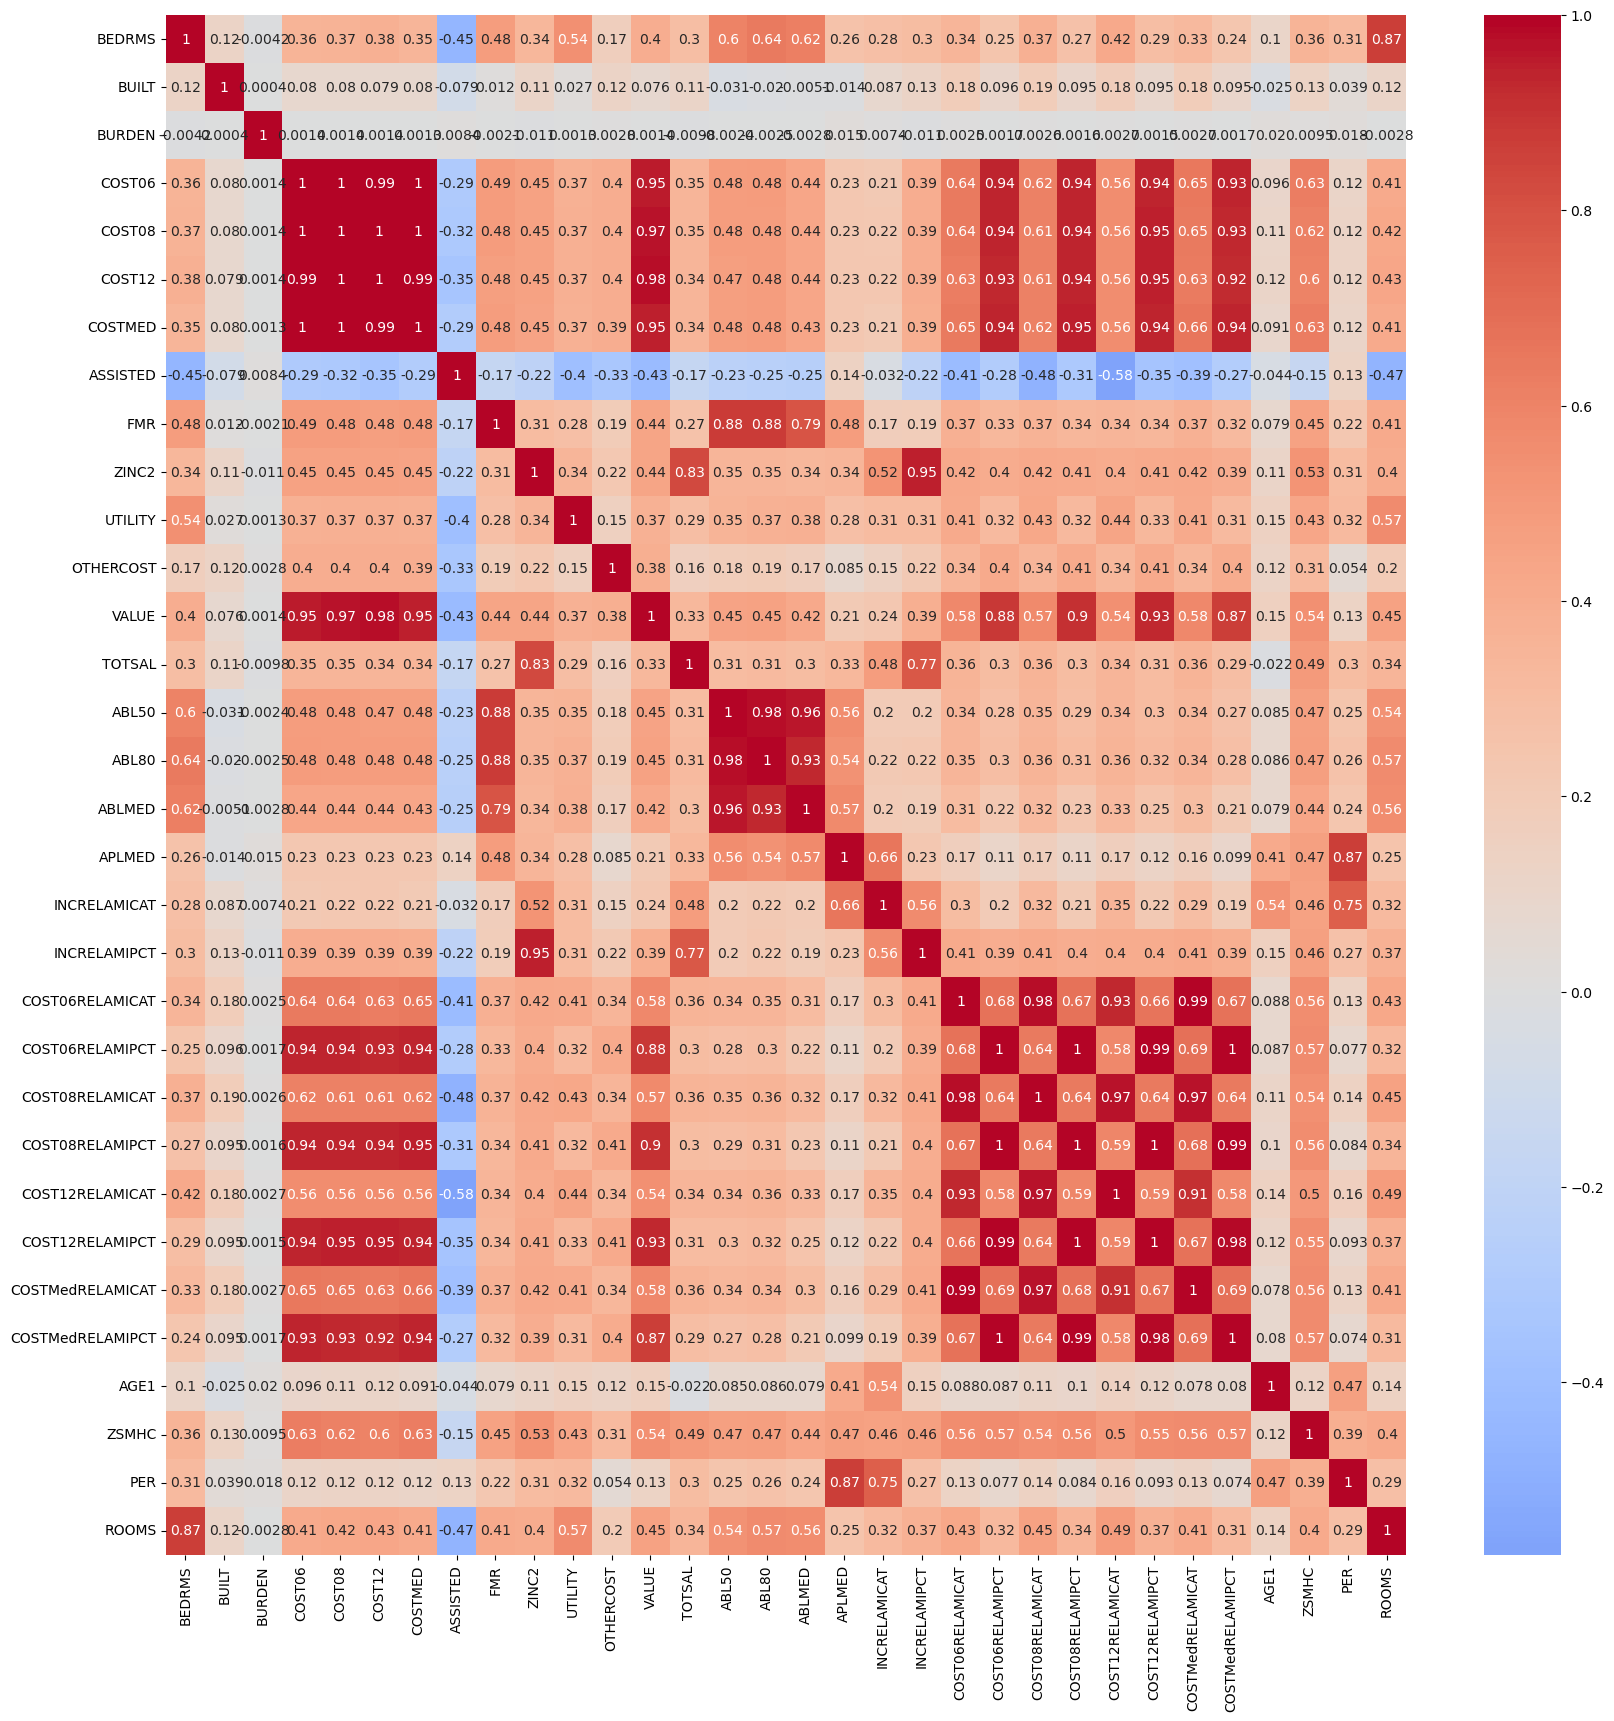

In [44]:
# plot the heatmap
plt.figure(figsize=(20,20)) 
sns.heatmap(correlation_matrix, 
        xticklabels=correlation_matrix.columns,
        yticklabels=correlation_matrix.columns,
        annot=True, cmap='coolwarm', center=0)


## Feature Selection

For our model we choose the most important columns in our opinion

1. **'BURDEN'**: Housing cost as a fraction of income.
2. **'INCRELAMIPCT'**: Household income relative to Area Median Income (AMI), as a percentage.
3. **'BEDRMS'**: Number of bedrooms in the unit.
4. **'AGE1'**: Age of the head of the household.
5. **'UTILITY'**: Monthly utility cost.
6. **'ZINC2'**: Total income of the household.
7. **'ZSMHC'**: Monthly housing costs.
8. **'VALUE'**: Current market value of the unit.
9. **'TOTSAL'**: Total wage income.
10. **'PER'**: Number of persons in household.
11. **'ROOMS'**: Number of rooms in the unit.


In [71]:
important_columns = ['BURDEN', 'INCRELAMIPCT', 'BEDRMS', 'AGE1', 'UTILITY', 'ZINC2', 'ZSMHC', 'VALUE', 'TOTSAL', 'PER', 'ROOMS']
important_df = data[important_columns]


In [72]:
data.columns

Index(['BEDRMS', 'BUILT', 'BURDEN', 'COST06', 'COST08', 'COST12', 'COSTMED',
       'ASSISTED', 'FMR', 'ZINC2', 'UTILITY', 'OTHERCOST', 'VALUE', 'TOTSAL',
       'ABL50', 'ABL80', 'ABLMED', 'APLMED', 'INCRELAMICAT', 'INCRELAMIPCT',
       'COST06RELAMICAT', 'COST06RELAMIPCT', 'COST08RELAMICAT',
       'COST08RELAMIPCT', 'COST12RELAMICAT', 'COST12RELAMIPCT',
       'COSTMedRELAMICAT', 'COSTMedRELAMIPCT', 'REGION', 'METRO3', 'AGE1',
       'ZSMHC', 'PER', 'ROOMS'],
      dtype='object')

In [73]:

for c in important_columns:
    if c not in merged_df.columns:
        print(c)

In [74]:
important_df.head()

,BURDEN,INCRELAMIPCT,BEDRMS,AGE1,UTILITY,ZINC2,ZSMHC,VALUE,TOTSAL,PER,ROOMS
0,-9.000000,-9.000000,3,-9,0.000000,-6,-6,140000,-9,-6,5
1,0.120759,101.917950,3,69,296.500000,47400,477,250,0,1,5
2,0.368308,74.922556,3,45,131.666667,26000,798,130000,26000,1,6
3,0.099420,325.077978,4,47,134.000000,174050,1442,300000,126000,5,7
4,0.134063,144.211703,2,30,126.666667,64000,715,-6,42000,2,5


In [75]:
data = important_df.copy()

In [76]:
# Renaming columns
data = data.rename(columns={
    'AGE': 'age_of_head', 
    'ZSMHC': 'monthly_housing_cost', 
    'PER': 'household_size', 
    'ROOMS': 'num_of_rooms',
    'INCRELFMRCAT': 'income_to_fmr_category',
    'INCRELFMRPCT': 'income_to_fmr_percent',
    'FMTMETRO3': 'central_city_suburban_status',
    'TENURE': 'owner_renter_status',
    'UTILITY': 'monthly_utility_cost'
})

print(data.columns)


Index(['BURDEN', 'INCRELAMIPCT', 'BEDRMS', 'AGE1', 'monthly_utility_cost',
       'ZINC2', 'monthly_housing_cost', 'VALUE', 'TOTSAL', 'household_size',
       'num_of_rooms'],
      dtype='object')


In [77]:
data.head()

,BURDEN,INCRELAMIPCT,BEDRMS,AGE1,monthly_utility_cost,ZINC2,monthly_housing_cost,VALUE,TOTSAL,household_size,num_of_rooms
0,-9.000000,-9.000000,3,-9,0.000000,-6,-6,140000,-9,-6,5
1,0.120759,101.917950,3,69,296.500000,47400,477,250,0,1,5
2,0.368308,74.922556,3,45,131.666667,26000,798,130000,26000,1,6
3,0.099420,325.077978,4,47,134.000000,174050,1442,300000,126000,5,7
4,0.134063,144.211703,2,30,126.666667,64000,715,-6,42000,2,5


In [78]:
data.household_size.value_counts()

 2     90434
 1     79295
 3     43386
 4     38124
-6     22706
 5     17766
 6      6338
 7      2297
 8       891
 9       364
 10      140
 11       68
 12       36
 13       20
 14       13
 15        3
 20        2
 16        1
 17        1
Name: household_size, dtype: int64

As we can see we should deep dive into **Data Cleaning**.

In [66]:
data.household_size.describe()

count    301885.000000
mean          1.865154
std           2.647165
min          -6.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: household_size, dtype: float64

In [80]:
data.describe()

,BURDEN,INCRELAMIPCT,BEDRMS,AGE1,monthly_utility_cost,ZINC2,monthly_housing_cost,VALUE,TOTSAL,household_size,num_of_rooms
count,301885.000000,301885.000000,301885.000000,301885.000000,301885.000000,3.018850e+05,301885.000000,3.018850e+05,3.018850e+05,301885.000000,301885.000000
mean,1.712311,105.309423,2.702831,46.471829,204.742507,6.168334e+04,1114.588602,1.541511e+05,4.564342e+04,1.865154,5.644047
std,107.793191,123.137674,1.079862,22.943180,139.477489,7.564790e+04,1033.935940,2.620763e+05,6.495125e+04,2.647165,1.866052
min,-9.000000,-71.217304,0.000000,-9.000000,0.000000,-2.831600e+04,-6.000000,-6.000000e+00,-9.000000e+00,-6.000000,1.000000
25%,0.121663,32.377334,2.000000,34.000000,106.000000,1.678800e+04,461.000000,-6.000000e+00,0.000000e+00,1.000000,4.000000
50%,0.225942,76.084714,3.000000,48.000000,187.833333,4.112000e+04,872.000000,8.000000e+04,2.520000e+04,2.000000,5.000000
75%,0.382522,140.801442,3.000000,62.000000,276.666667,8.177500e+04,1463.000000,2.000000e+05,6.800000e+04,3.000000,7.000000
max,18180.000000,3535.752969,10.000000,93.000000,1613.000000,2.977104e+06,13803.000000,5.264699e+06,1.675052e+06,20.000000,21.000000
